## Part I: CrossChatH

### Load required packages

In [1]:
import crosschat as cc
import scanpy as sc

/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/umap/distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/umap/distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packag

### Load data and preprocess

In [2]:
# You can download the data from this link: https://drive.google.com/drive/folders/1NU8htAxVHrEiNV7YqSzEkHFGBnM6vNlM
adata = sc.read_h5ad('../src/crosschat/data/mouse_embryo_skin3000.h5ad')
ccH_obj = cc.CrossChatH(adata,species="mouse")
ccH_obj.prepare_adata(normalize=False, scale=True, input='allgenes')

### Perform Multiscale clustering
To reduce noise, one can increase parameter values for `window_size` and `basin_radius`

In [3]:
ccH_obj.Multsicale_clustering(cluster_by="lr")
ccH_obj.select_partitions(window_size=10, basin_radius=10, lr = "L")
ccH_obj.select_partitions(window_size=10, basin_radius=10, lr = "R")

100%|██████████| 100/100 [00:16<00:00,  6.19it/s]
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
100%|██████████| 100/100 [00:17<00:00,  5.69it/s]
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: Runtim

### Draw clustering results

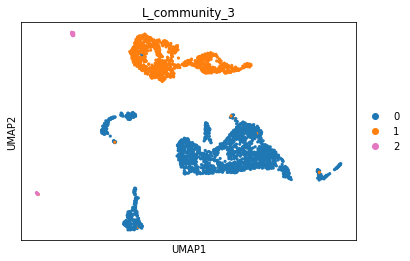

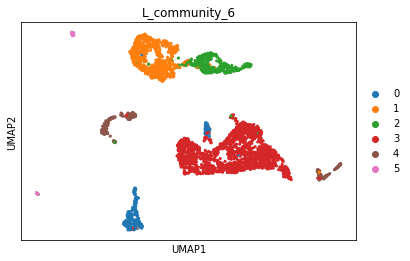

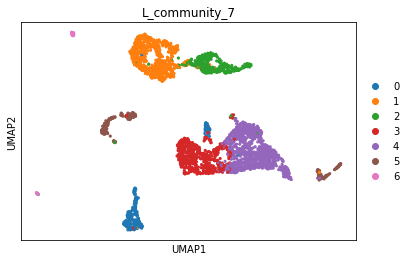

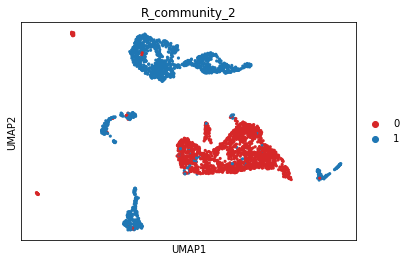

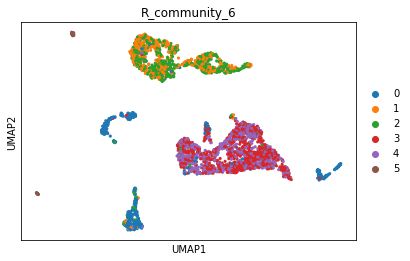

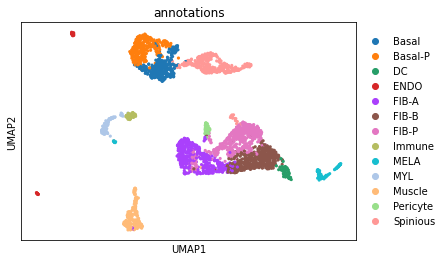

In [4]:
ccH_obj.Draw_multiscale_umap("L")
ccH_obj.Draw_multiscale_umap("R")
ccH_obj.Draw_annotations_umap()

### Find specific LR pairs

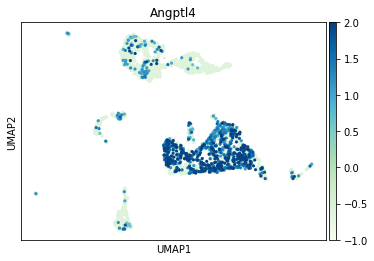

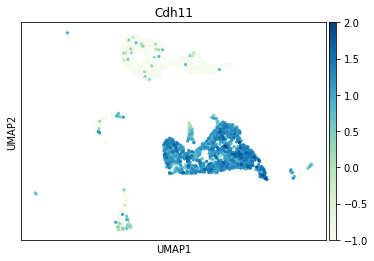

In [5]:
top20_specific_LR = ccH_obj.Detect_specific_LRs(topN=20)
gene_ls = ['Angptl4','Cdh11']
for gene in gene_ls:
    sc.pl.umap(ccH_obj.adata, color=f"{gene}",cmap='GnBu',vmin=-1,vmax=2)

### Draw CCC of specific LR pairs

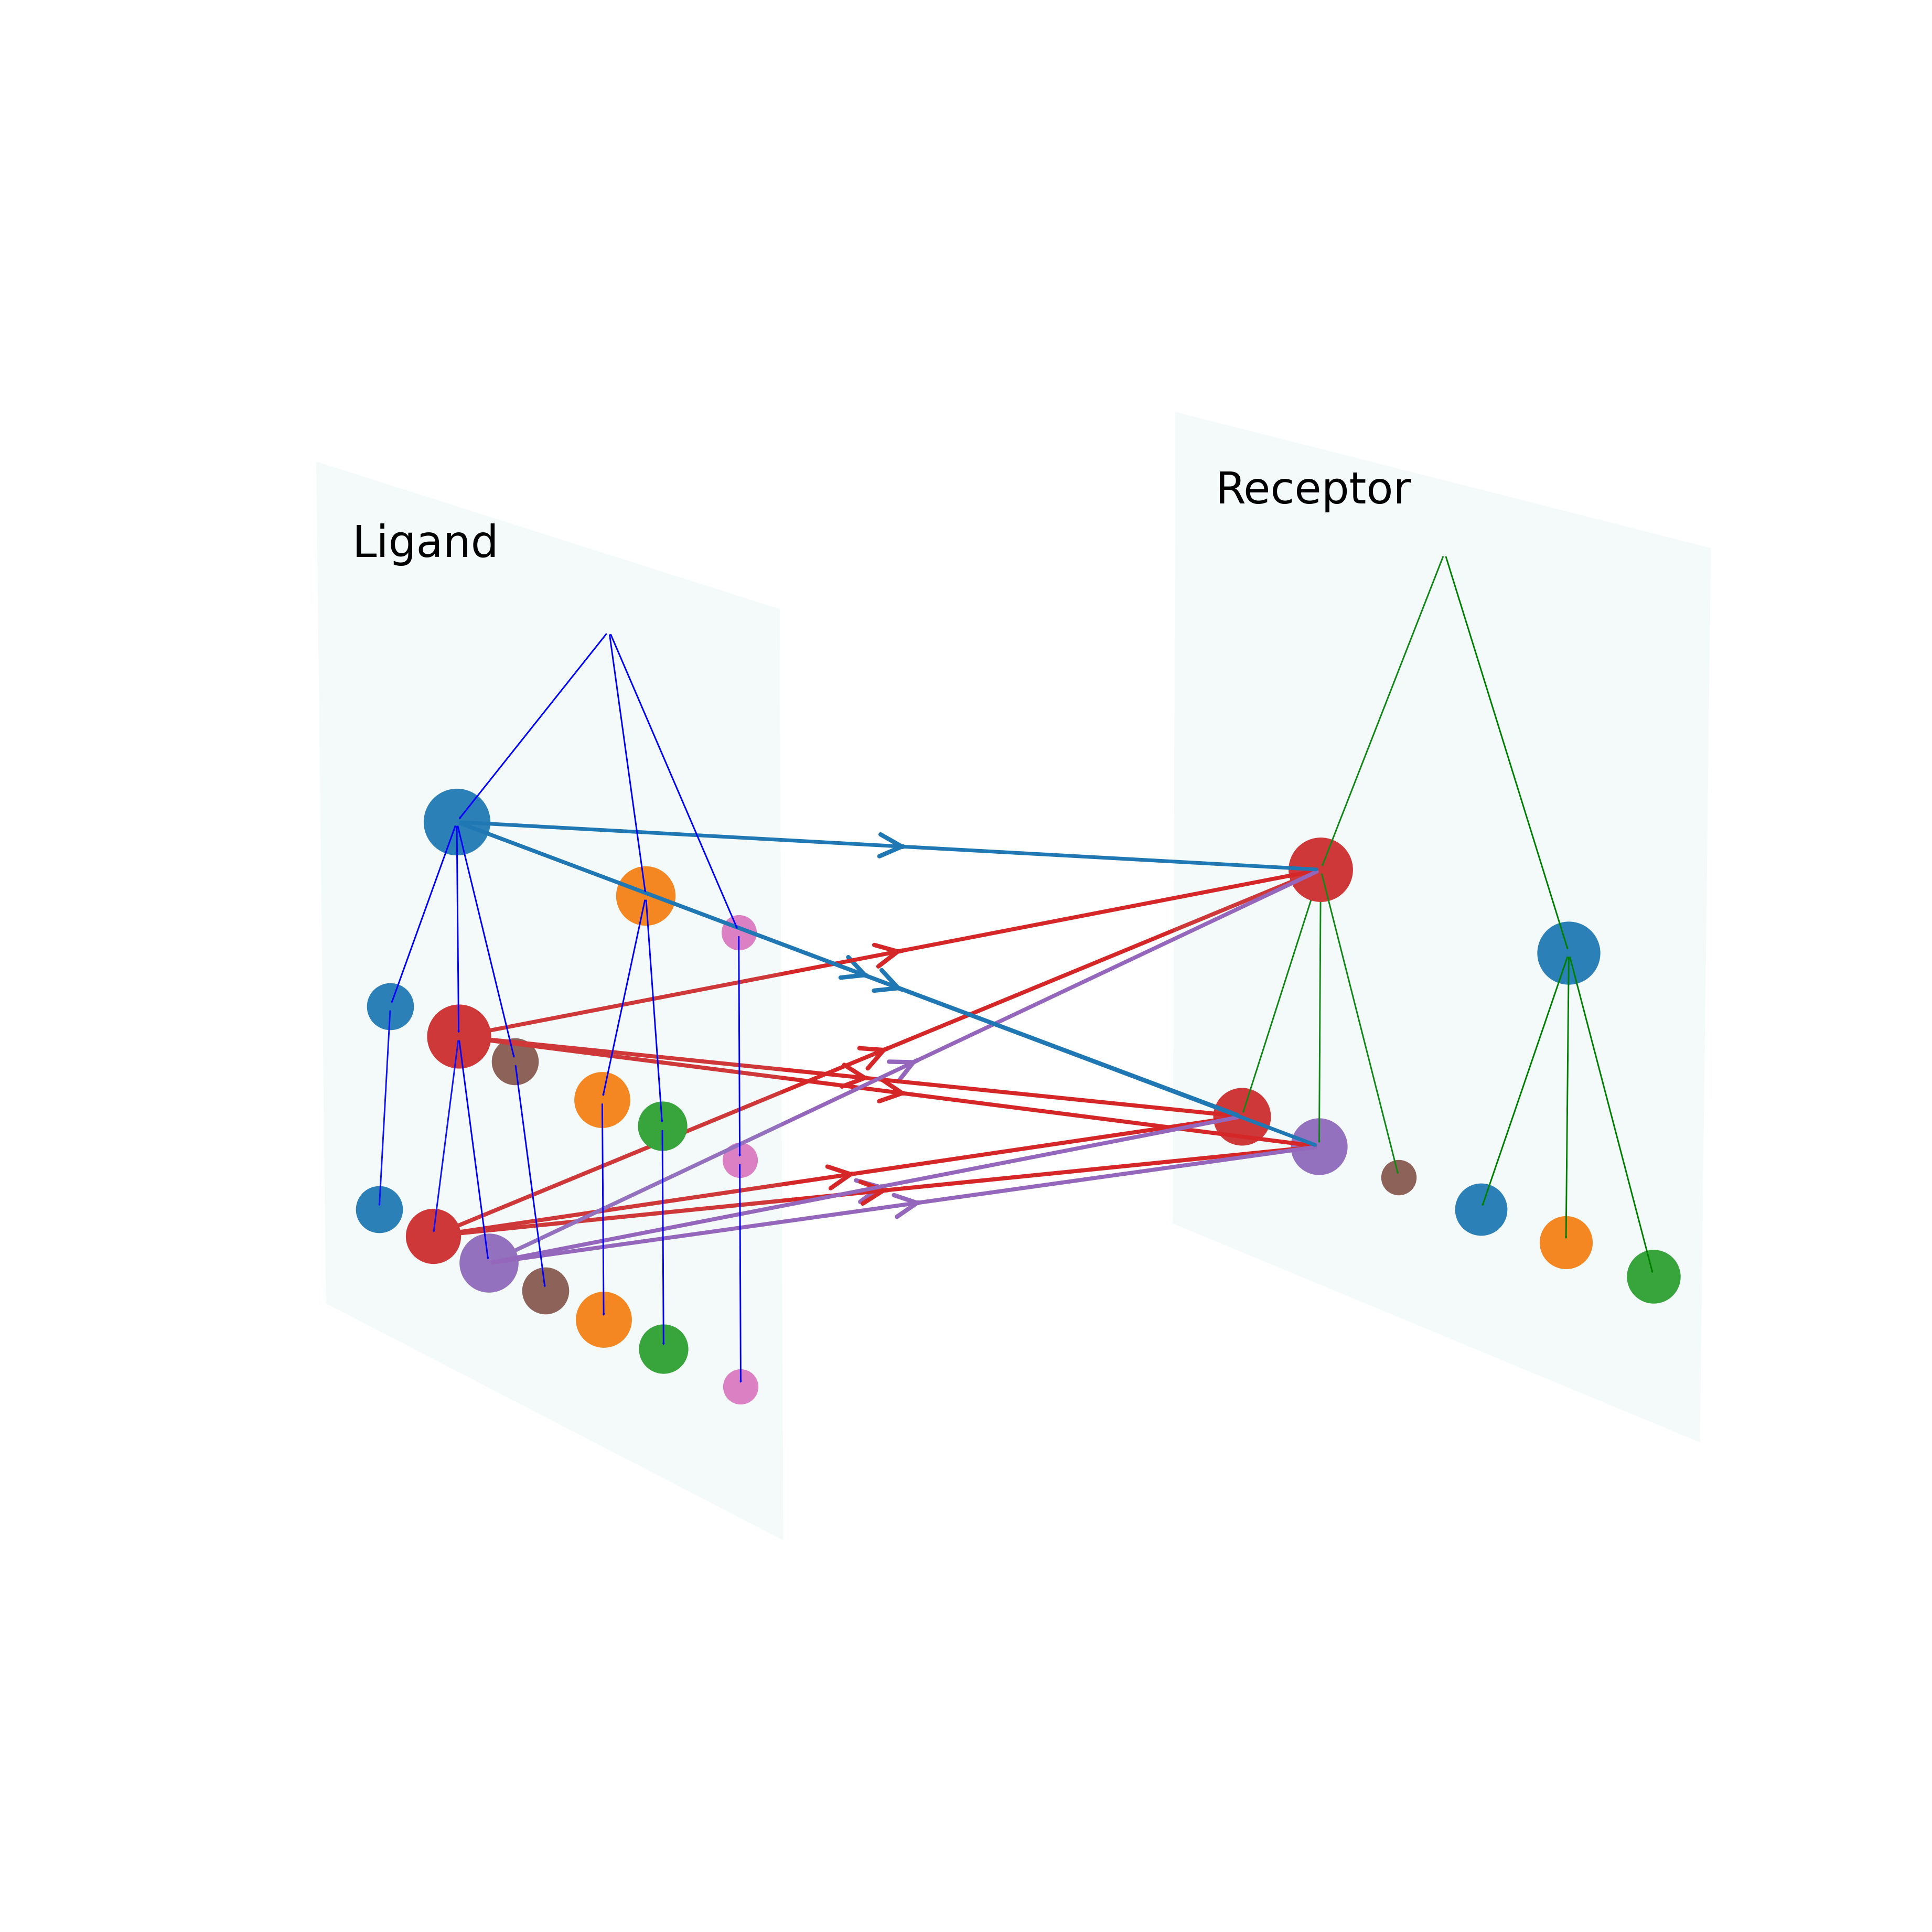

In [6]:
ccH_obj.Draw_CCC_LR(ligand=['ANGPTL4'],receptor=['CDH11'],CCC_threshold=0.4)

### Cluster specific LR pairs

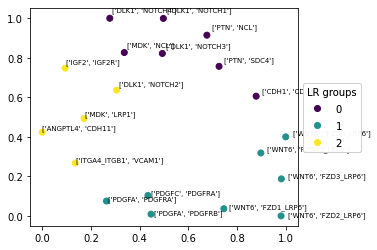

In [7]:
LR_ls = [[x[0],x[1]] for x in top20_specific_LR.iloc[0:20][['Ligand','Receptor']].values]
ccH_obj.Cluster_LRs(LR_ls)

### Draw CCC of pathways

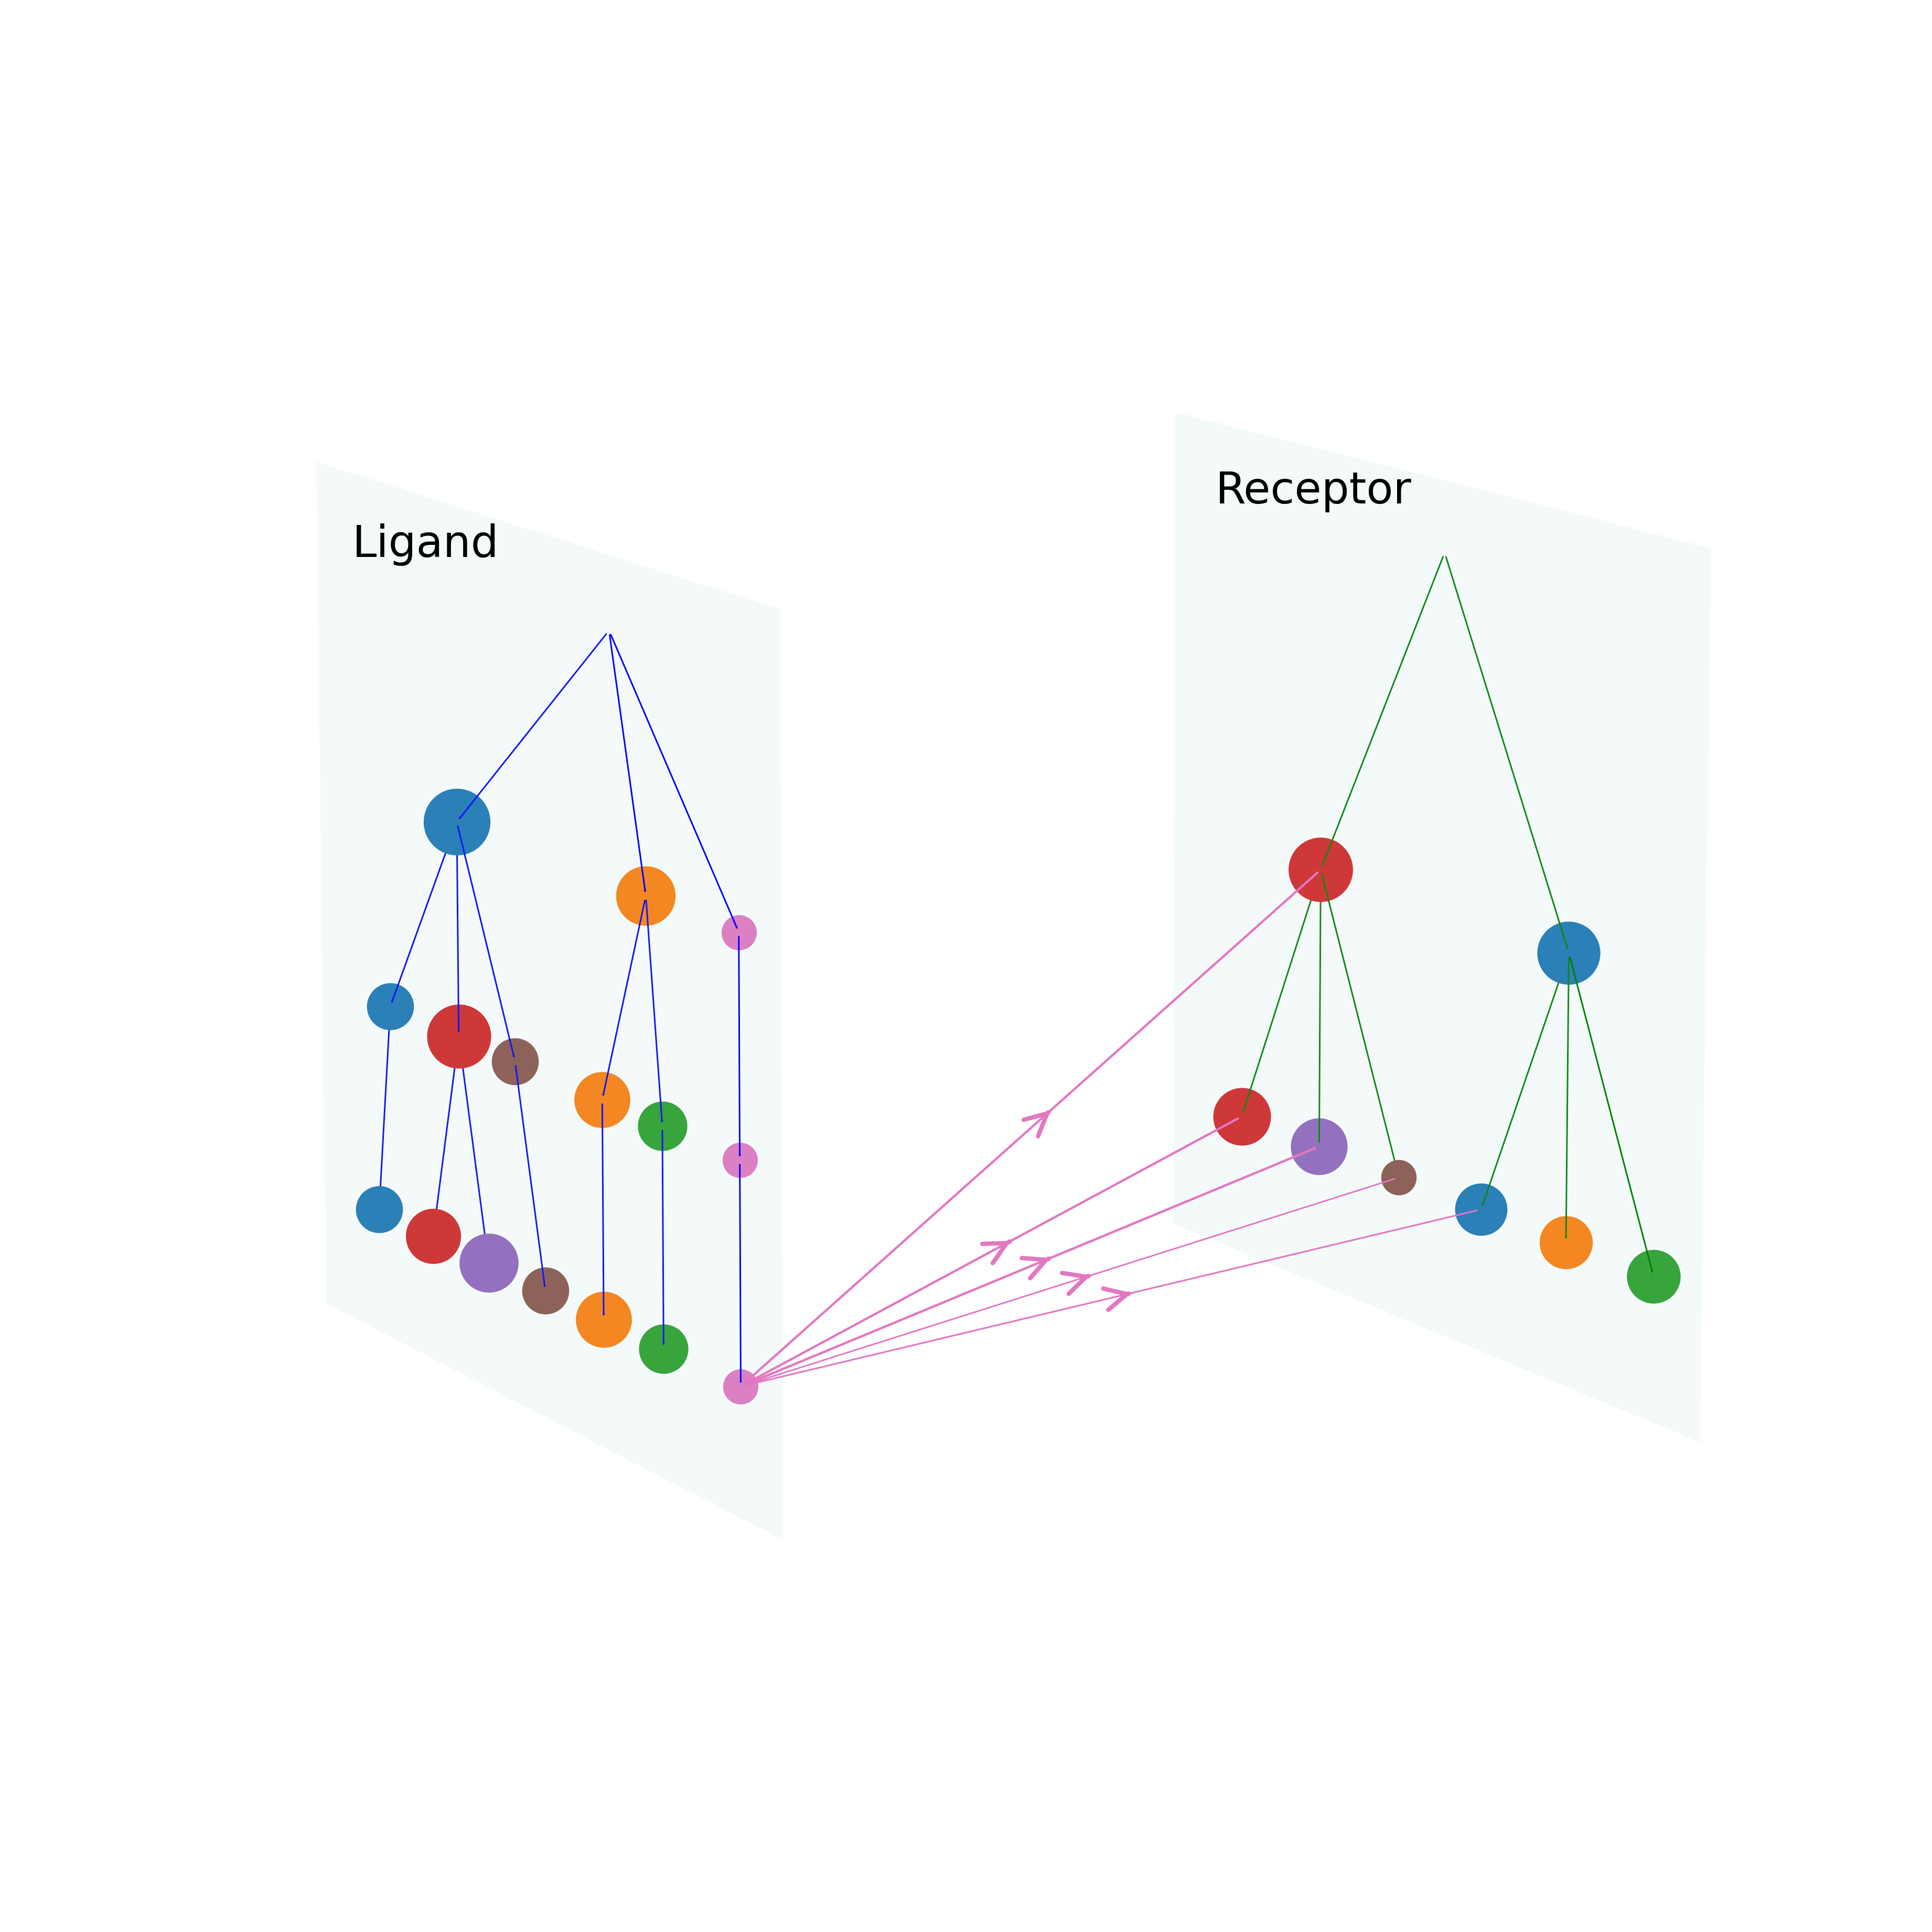

In [8]:
active_pathways = ccH_obj.Detect_active_pathways()
pathway = 'ANGPT'
ccH_obj.Draw_CCC(pathway,CCC_threshold=0.2)

### Cluster pathways

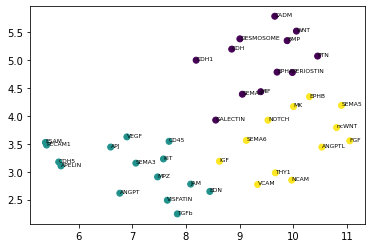

In [9]:
ccH_obj.Cluster_pathways(nclusters=3)

### CrossChatH on spatial data
Once we detected multiscale clusters using spatial information, the rest of procedures are similar to those applied to scRNA-seq datasets.

In [2]:
adata = sc.read_h5ad('../src/crosschat/data/mouse_wounded_skin_PO7_visium.h5ad')
ccH_obj = cc.CrossChatH(adata,species="mouse")
ccH_obj.prepare_adata(normalize=False, scale=True, input='allgenes')
ccH_obj.Multsicale_clustering_spatial(cluster_by="allgenes")
ccH_obj.select_partitions(max_nvi=0.1, window_size=10, basin_radius=10, lr = "L")
ccH_obj.Draw_multiscale_umap("L",spatial=True)

ValueError: cannot specify integer `bins` when input data contains infinity